In [126]:
import os
import cv2
import easyocr
import pandas as pd
import matplotlib.pyplot as plt


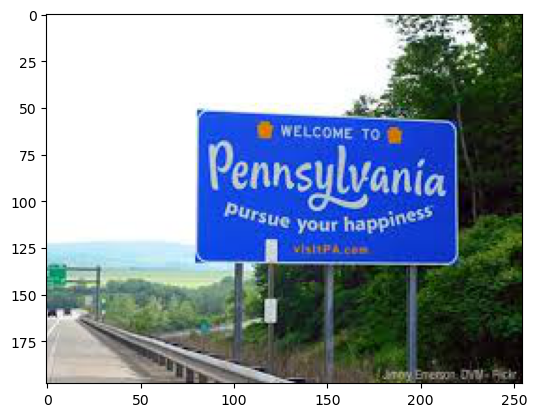

In [127]:
img = cv2.imread(os.path.relpath("../../Data/PittsburghSign.jpeg"))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

## Using EasyOCR

In [128]:
reader = easyocr.Reader(['en'])
result = reader.readtext(gray,paragraph='False')
df=pd.DataFrame(result)
print(df[1])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


0                             MELCOME To]
1    (Pennsylyania] pursue Vour happiness
Name: 1, dtype: object


## Using tessseract
This fails.  Tesseract isn't very good at reading from real-world text

In [129]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'/usr/local/bin/tesseract'

data = pytesseract.image_to_string(gray)
print(data)
# Note, there isn't even an answer here


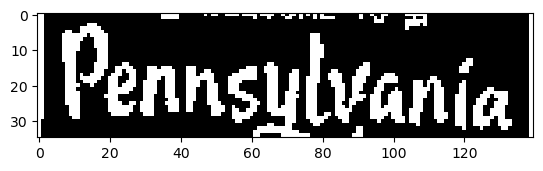

In [130]:
gray_cropped = gray[65:100,80:220]
gray_cropped = cv2.threshold(gray_cropped, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
plt.imshow(gray_cropped,cmap='gray')


data = pytesseract.image_to_string(gray_cropped)
print(data)
# Still nothing found

## try cropped on EasyOCR

In [131]:
result = reader.readtext(gray_cropped,paragraph='False')
df=pd.DataFrame(result)
print(df[1])

0    Pennsulvania 
Name: 1, dtype: object


# Example reading text 

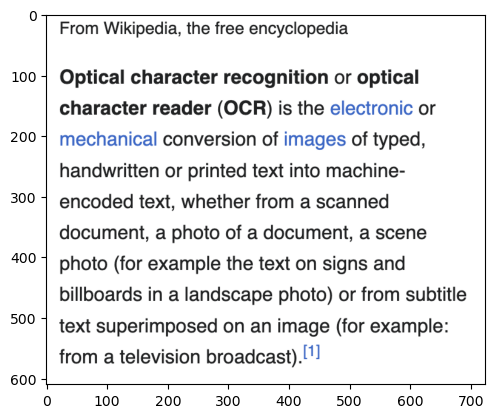

In [132]:
img = cv2.imread(os.path.relpath("../../Data/OCR_exampleText.png"))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

In [133]:
data = pytesseract.image_to_string(gray)
print(data)

From Wikipedia, the free encyclopedia

Optical character recognition or optical
character reader (OCR) is the electronic or
mechanical conversion of images of typed,
handwritten or printed text into machine-
encoded text, whether from a scanned
document, a photo of a document, a scene
photo (for example the text on signs and
billboards in a landscape photo) or from subtitle
text superimposed on an image (for example:
from a television broadcast).!"



In [134]:
result = reader.readtext(gray)
df=pd.DataFrame(result)
print(df[1])

0           From Wikipedia; the free encyclopedia
1        Optical character recognition or optical
2     character reader (OCR) is the electronic 0r
3       mechanical conversion of images of typed,
4       handwritten or printed text into machine-
5            encoded text; whether from a scanned
6        document; a photo of a document; a scene
7        photo (for example the text on signs and
8                                 billboards in a
9               landscape photo) or from subtitle
10    text superimposed on an image (for example:
11               from a television broadcast) [1]
Name: 1, dtype: object


## Example used for title slide on PPT

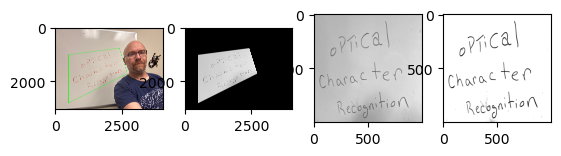

In [135]:
import numpy as np
img = cv2.imread('OCR - 1.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


pts = np.array([[500,1000],[2400,750],[2700,1700],[500,2800]])
cv2.polylines(img,[pts],True,(0,255,0),thickness=8)

mask = np.zeros(gray.shape,dtype=np.uint8)
cv2.fillPoly(mask,[pts],255)

masked = cv2.bitwise_and(gray,gray,mask=mask)

ptsIdeal = np.array([[0,0],[1000,0],[1000,1000],[0,1000]])

M =cv2.getPerspectiveTransform(np.float32(pts),np.float32(ptsIdeal))

gray_warped = cv2.warpPerspective(gray,M,(1000,1000))

thresh = cv2.threshold(gray_warped, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

plt.subplot(141); plt.imshow(img)
plt.subplot(142); plt.imshow(masked,cmap='gray')
plt.subplot(143); plt.imshow(gray_warped,cmap='gray')
plt.subplot(144); plt.imshow(thresh,cmap='gray')



In [136]:
result = reader.readtext(gray_warped)
df=pd.DataFrame(result)
print(df)

                                                   0             1         2
0     [[30, 484], [834, 484], [834, 706], [30, 706]]  Chaca c te 0  0.335993
1  [[213.75585724727847, 184.10974392224045], [64...         PfiCa  0.421722
2  [[199.2171562471344, 787.2766624805138], [863....    Recojation  0.503913
